# K Means Clustering

k-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 

## Algorithm
The algorithm works by initializing $k$ different centroids $ {\mu(1) , \cdots ,\mu( k )}$ to different values, then alternating between two different steps until convergence:

* In one step, each training example is assigned to cluster i, where i is the index of the nearest centroid $\mu(i)$.
* In the other step, each centroid $\mu(i)$ is updated to the mean of all training examples $x(j)$ assigned to cluster $i$ .

Let's _assume_ we have a sample from the [UCI Activity Recognition dataset](http://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer), which contains data from a wearable accelerometer mounted on the chest. The data was collected while a person was performing one of four different activities, viz. standing, walking, going up/downstairs and working on a computer.

Given the data, our task is to form four clusters based on the given samples. This could be further built upon to develop predictive models in the future. For your convenience, the data is stored in a numpy-ready format, which can be loaded from `acc.npy`. 

Enough talking. Let's see some action

In [1]:
# We start with the standard imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Just for viewing pleasure
import seaborn as sns;
sns.set()
sns.set_palette("husl")

Let us first explore what the data looks like.

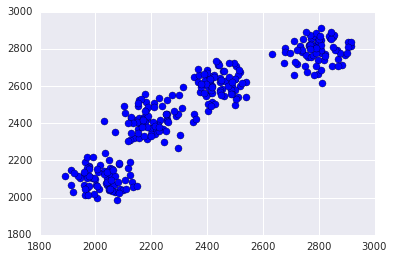

In [2]:
data = np.load('data/acc.npy')
# Let's see what the data looks like
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.show()

Great! We seem to be lucky enough. Looks like this data can be clustered easily.  
Let's build upon the algorithm step by step. The first step is to randomly initialize cluster centroids. Complete the following function
## Task 1

In [3]:
def initialize_centroids(data, k):
    """Returns k centroids randomly from the initial points."""
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

Let's see whether you got it right. Once you complete the function above, the plot should look like the one below

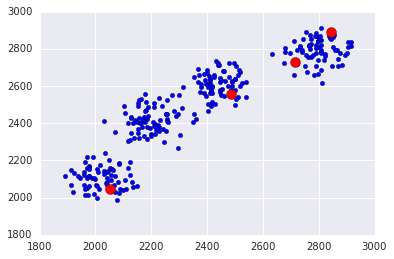

In [4]:
# We need four clusters
K = 4
plt.scatter(data[:, 0], data[:, 1])
centroids = initialize_centroids(data, K)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

Don't worry if you don't get the centroids spaced evenly. Random initialization has its own problems. Anyway, let's carry on to the next step, which is to associate each data point to a centroid. Complete the function below
## Task 2

In [5]:
def closest_centroid(data, centroids):
    """Returns an array containing the index to the nearest centroid for each point"""
    # How does this work? There's broadcasting. Again!
    # Please read through the numpy docs on broadcasting,
    # particularly the last example about outer addition
    # https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    distances = np.sqrt(((data - centroids[:, None])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

Does that work? Let's see it in action.

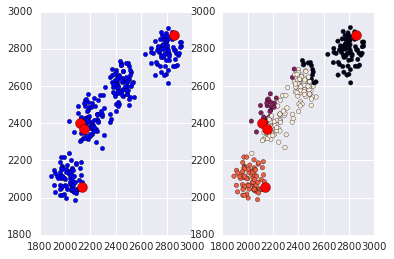

In [6]:
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1])
centroids = initialize_centroids(data, K)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

closest = closest_centroid(data, centroids)

plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

Do you see different datapoints being assigned to different centroids? Cool!  
The next step is fairly easy. You just need to shift the centroids to their new mean. Complete the function below
## Task 3

In [7]:
def shift_centroids(data, closest, centroids):
    """Returns the new centroids assigned from the points closest to them"""
    return np.array([data[closest==k].mean(axis=0) for k in range(K)])

## Showtime
Now that this is done, let's sew it up together.  
Oh wait! We still need to iterate until convergence! Complete the function below
## Task 4

In [8]:
def kmeans(data, k):
    initial_centroids = initialize_centroids(data, k)
    centroids = initial_centroids
    old_centroids = np.zeros_like(centroids)
    while not np.allclose(centroids, old_centroids):
        old_centroids = centroids
        closest = closest_centroid(data, centroids)
        centroids = shift_centroids(data, closest, centroids)
    return closest, centroids, initial_centroids

## Showtime
This time for sure.

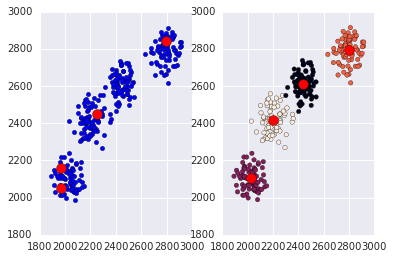

In [9]:
K = 4
data = np.load('data/acc.npy')

closest, centroids, initial_centroids = kmeans(data, 4)

plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='r', s=100)
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

Congratulations! You're through with K-means. Now let's move over to Fuzzy C-means in the next notebook.